# Decision Tree Ödevi (dava_sonuclari.csv)

## Görevler
1. Eksik veya aykırı değerleri kontrol edip gerekirse temizleyin.  
2. Veriyi eğitim (%80) ve test (%20) olarak ayırın.  
3. Decision Tree modelini kurup eğitin.  
4. Accuracy, Precision, Recall, F1-Score gibi metrikleri hesaplayın.  
5. Karar ağacını görselleştirip hangi özelliklerin daha etkili olduğunu yorumlayın.


In [34]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('dava_sonuclari.csv')
data.head()
import numpy as n
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #veriyi eğitim ve test olarak ayırdım.
from sklearn.tree import DecisionTreeClassifier, plot_tree #decisiontreeclassfier ile karar ağacı modeli kurdum.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

## 1. Eksik Değer Kontrolü ve Temizleme

In [25]:
data.head()

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
0,Criminal,221,39,18,24306,2,663160,3,1,29014,1,0
1,Civil,212,14,1,42444,3,252011,67,4,21591,1,0
2,Civil,47,6,19,21418,1,307309,66,6,25530,3,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
4,Criminal,33,17,17,36315,2,84229,38,2,38244,2,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Case Duration (Days)        200 non-null    int64
 1   Judge Experience (Years)    200 non-null    int64
 2   Number of Witnesses         200 non-null    int64
 3   Legal Fees (USD)            200 non-null    int64
 4   Plaintiff's Reputation      200 non-null    int64
 5   Defendant's Wealth (USD)    200 non-null    int64
 6   Number of Evidence Items    200 non-null    int64
 7   Number of Legal Precedents  200 non-null    int64
 8   Settlement Offered (USD)    200 non-null    int64
 9   Severity                    200 non-null    int64
 10  Outcome                     200 non-null    int64
 11  Case Type_Commercial        200 non-null    bool 
 12  Case Type_Criminal          200 non-null    bool 
dtypes: bool(2), int64(11)
memory usage: 17.7 KB


In [26]:
print("\nEksik değer kontrolü:")
print(data.isnull().sum())


Eksik değer kontrolü:
Case Type                     0
Case Duration (Days)          0
Judge Experience (Years)      0
Number of Witnesses           0
Legal Fees (USD)              0
Plaintiff's Reputation        0
Defendant's Wealth (USD)      0
Number of Evidence Items      0
Number of Legal Precedents    0
Settlement Offered (USD)      0
Severity                      0
Outcome                       0
dtype: int64


# Eksikleri silme

In [27]:
data=data.dropna() #eksik değer yok.

## 3. Kategorik Değişkenleri Encode Etme

In [28]:
data=pd.get_dummies(data, drop_first=True)#encode ne demek öğren 
X= data.drop("Outcome", axis=1) 
y= data["Outcome"]

## 4. Veri Setini Eğitim ve Test Olarak Ayırma

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 5. Decision Tree Modelini Kurma ve Eğitme

In [30]:
clf= DecisionTreeClassifier(random_state=42, max_depth=5) 
clf.fit(X_train, y_train) 
y_pred= clf.predict(X_test)

## 6. Modeli Değerlendirme (Accuracy, Precision, Recall, F1-Score)

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



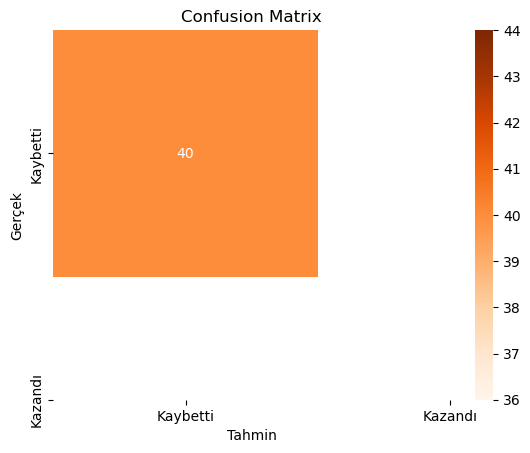

In [35]:
acc = accuracy_score(y_test, y_pred) #doğru tahminlerin tüm tahminlere oranı
prec = precision_score(y_test, y_pred) #pozitif tahminlerin doğru olma oranı
rec = recall_score(y_test, y_pred) #gerçek pozitiflerin kaçına ualştık
f1 = f1_score(y_test, y_pred) #precision ve recall dengesi

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

print("\nClassification Report:\n", classification_report(y_test, y_pred,))

cm = confusion_matrix(y_test, y_pred,)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["Kaybetti", "Kazandı"], yticklabels=["Kaybetti", "Kazandı"]) #sns.heatmap ile ısı haritası çizdim. annot=true ile kutuların içine sayıları yazdım. fmt="d" ile sayıları tam sayı yaptım. 
plt.title("Confusion Matrix")
plt.ylabel("Gerçek")
plt.xlabel("Tahmin")
plt.show()


Accuracy  1.0   Tüm tahminler doğru görünüyor ama veri dengesiz. 
Precision 0.0   Model “kazandı” sınıfı için hiç doğru tahmin yapmamış.   
Recall    0.0   Gerçek “kazandı” örneklerinden hiçbiri yakalanmamış.     
F1 Score  0.0   Precision ve Recall sıfır olduğu için bu da sıfır.       

Model %100 doğruymuş gibi görünüyor ama aslında “kazandı” durumunu hiç öğrenememiş. Bu bir dengesiz veri (imbalanced data) problemi.


## 7. Karar Ağacını Görselleştirme

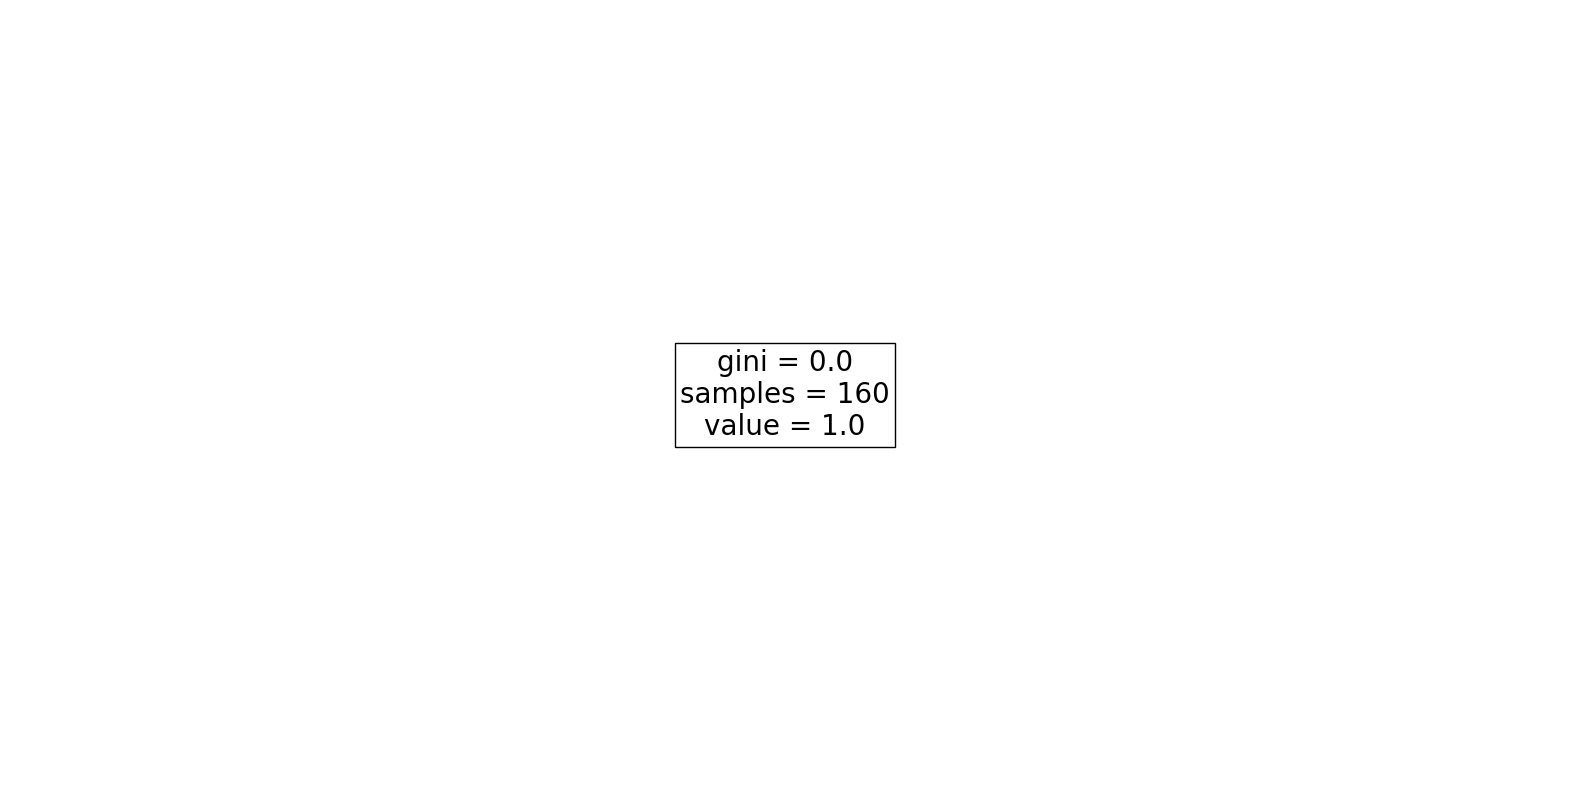

In [14]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["Kaybetti", "Kazandı"], filled=True, fontsize=20) #feature_names=X.columns ile ağacın dallarında hangi özellik kullanıldığını yazdım. class_names ile yapraklarda sınıf isimelrini yazdım. filled ile kutu renklerini sınıfa göre boyadım.
plt.show()

gini: düğümdeki verinin ne kadar karışık olduğunu gösterir.
Tüm veriler tek bir sınıfa ait. Yani ağacın içinde hiç ayrım yok.

samples: o düğümdeki örnek sayısı
Toplam 160 gözlem var ve hepsi bu tek düğümde.

value: sınıfların dağılımı 
Hepsi aynı sınıfta.

class: o düğümdeki baskın sınıf

## hangi özelliklerin daha etkili olduğunu yorumlayın


Özelliklerin Önemi:
                       Özellik  Önem Skoru
0         Case Duration (Days)         0.0
1     Judge Experience (Years)         0.0
2          Number of Witnesses         0.0
3             Legal Fees (USD)         0.0
4       Plaintiff's Reputation         0.0
5     Defendant's Wealth (USD)         0.0
6     Number of Evidence Items         0.0
7   Number of Legal Precedents         0.0
8     Settlement Offered (USD)         0.0
9                     Severity         0.0
10        Case Type_Commercial         0.0
11          Case Type_Criminal         0.0


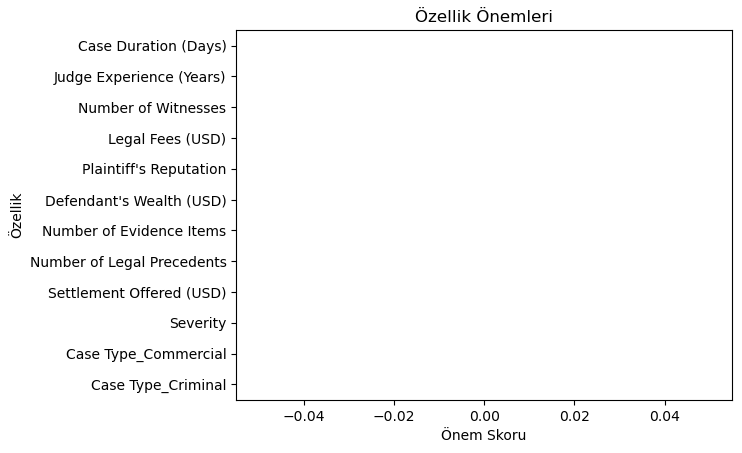

In [36]:
importances = pd.DataFrame({
    "Özellik": X.columns,
    "Önem Skoru": clf.feature_importances_
}).sort_values(by="Önem Skoru", ascending=False)

print("\nÖzelliklerin Önemi:")
print(importances)

sns.barplot(data=importances, x="Önem Skoru", y="Özellik", palette="viridis")
plt.title("Özellik Önemleri")
plt.show()